In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


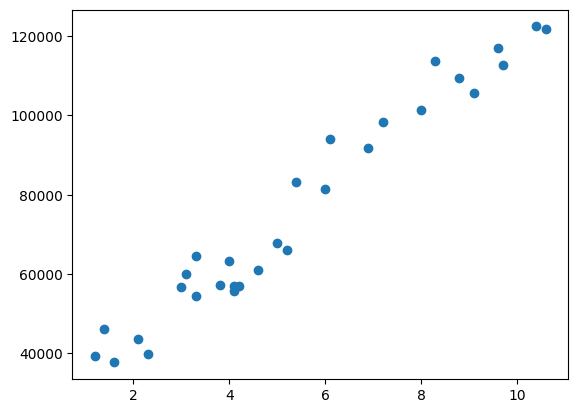

In [25]:
data = pd.read_csv('Salary_dataset.csv')
plt.scatter(data.YearsExperience, data.Salary)
plt.show()

In [32]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [38]:
#loss function (root mean square)
def rms(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].YearsExperience
        y = points.iloc[i].Salary
        total_error += (y - m * x + b) ** 2
    return total_error /  float(len(points))   

In [43]:
#optimization (gradient descent)
def gd(m_current, b_current, points, lr):
    m_gradient = 0
    b_gradient = 0   
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].YearsExperience
        y = points.iloc[i].Salary       
        
        m_gradient += -(2/n) * x * (y - (m_current * x + b_current))
        b_gradient += -(2/n) * (y - (m_current * x + b_current))
        
    m = m_current - m_gradient * lr
    b = b_current - b_gradient * lr  
    return m, b   

In [107]:
m = 0
b = 0
lr = 0.005
epochs = 1000
    
for i in range(epochs):
    if i % 50 == 0:
        print(f"epoch: {i}")
    m, b = gd(m, b, train_data, lr)
          
print(m, b)          


epoch: 0
epoch: 50
epoch: 100
epoch: 150
epoch: 200
epoch: 250
epoch: 300
epoch: 350
epoch: 400
epoch: 450
epoch: 500
epoch: 550
epoch: 600
epoch: 650
epoch: 700
epoch: 750
epoch: 800
epoch: 850
epoch: 900
epoch: 950
9774.098534264693 21993.00196753751


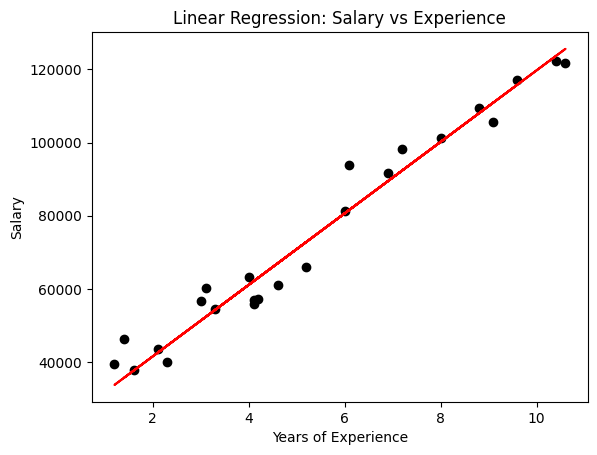

In [108]:
plt.scatter(train_data.YearsExperience, train_data.Salary, color="black", label="Train Data")
x_vals = list(train_data.YearsExperience)
y_vals = [m * x + b for x in x_vals]

plt.plot(x_vals, y_vals, color="red", label="Regression Line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Experience")
plt.show()

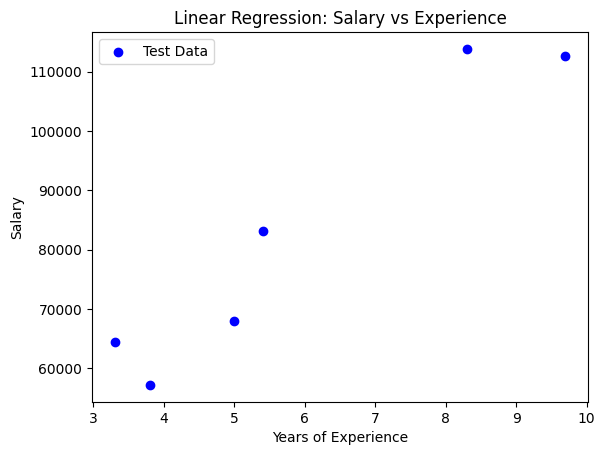

In [109]:
test_x = test_data.YearsExperience
test_y_pred = [m * x + b for x in test_x]

# Plot test data
plt.scatter(test_x, test_data.Salary, color="blue", label="Test Data")

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Experience")
plt.legend()
plt.show()